In [1]:
# Importar librerias
import numpy as np # Programación vectorial
import matplotlib.pyplot as plt # Visualización
import pandas as pd # Estructura y manipulación de datos
import io # Importando el módulo io
import seaborn as sns # se usa para la visualización de datos.

In [5]:
#CARGAR ARCHIVO DE DATOS, DESCARGUÉ Y SUBI ARCHIVO LOCAL
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv


In [3]:
df = pd.read_csv(next(iter(uploaded)))

In [4]:
# ANALISIS EXPLORATORIO DE DATOS
# IDENTIFICACION Y DESCRIPCION DE VARIABLES

#1. INFORMACION GENERAL
# N° FILAS Y COLUMNAS
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")


Número de filas: 1470
Número de columnas: 35


In [6]:
#2. VISTA PREVIA DE LOS DATOS
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [7]:
#3. TIPO DE DATOS
print(df.dtypes)

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
# 4. SEPARAR VARIABLES NUMERICAS Y CATEGORICAS

# SELECCIONO SOLO LAS COLUMNAS QUE TIENEN DATOS DE TIPO NUMERICO, OBTENGO LOS NOMBRES DE LAS COLUMNAS Y LAS PASO A UNA LISTA
variables_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# SELECCIONO SOLO LAS COLUMNAS QUE TIENEN DATOS DE TIPO NO NUMERICO, OBTENGO LOS NOMBRES DE LAS COLUMNAS Y LAS PASO A UNA LISTA
variables_categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

# IMPRIMO NUMERO DE VARIABLES PARA CADA TIPO Y LA LISTA DE CADA TIPO.
print(f"Variables numéricas ({len(variables_numericas)}): {variables_numericas}")
print(f"Variables categóricas ({len(variables_categoricas)}): {variables_categoricas}")
print("\n")

Variables numéricas (26): ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Variables categóricas (9): ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']




In [11]:
# 5. DESCIPCION DE LAS VARIABLES NUMERICAS

if len(variables_numericas) > 0:
    print("Estadísticas descriptivas de variables numéricas:")
    print(df[variables_numericas].describe().T)
    print("\n")

Estadísticas descriptivas de variables numéricas:
                           count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0   

**ANALISIS DE LOS RESULTADOS DE LAS ESTADISTICAS DESCRIPTIVA DE LAS VARIABLES NUMERICAS**

La edad promedio (Age) de los empleados es de 36.9 años, con un rango de 18 a 60 años. La mayoria de los empleados tienen entre 30 y 43 años.

Los empleados vinven en promedio a 9.2 unidades de distancia del trabajo. Con una desviacion estandar de 8.1. Algunos viven muy cerca (1 unidad de distancia) y otros viven a 29 unidades de distancia.

El promedio del nivel educativo de los empleados es de 2.9, en una escala de 1 a 5.

Los emplados han trabajado en promedio en 2.7 empresas antes.

Los empleados tienen en promedio 11.3 años de experiencia laboral total, con un maximo de 40 años.

El tiempo en la empresa es en promedio de 7 años, con uan desviacion estandar de 6.1

La posicion dentro de la empresa es en promedio de 4.2 años.

La media desde su ultima promocion es de 2.2.

Promedio de sueldo mendual es de: $6,502.93 , con un rango que va desde los $1,009 a $19,999.

El aumento del sueldo es en primedio de un %15.2.

La satisfaccion laboral es de un promedio de 2.73
La satidfaccion con el ambiente labroal es de 2.72
La satisfaccion con las relaciones laborales es de 2.71.
Y el balance entre el trabajo y la vida es de un primedio de 2.76.

**texto en negrita**


Variable: Attrition
Número de valores únicos: 2
           Frecuencia  Porcentaje (%)
Attrition                            
No               1233           83.88
Yes               237           16.12


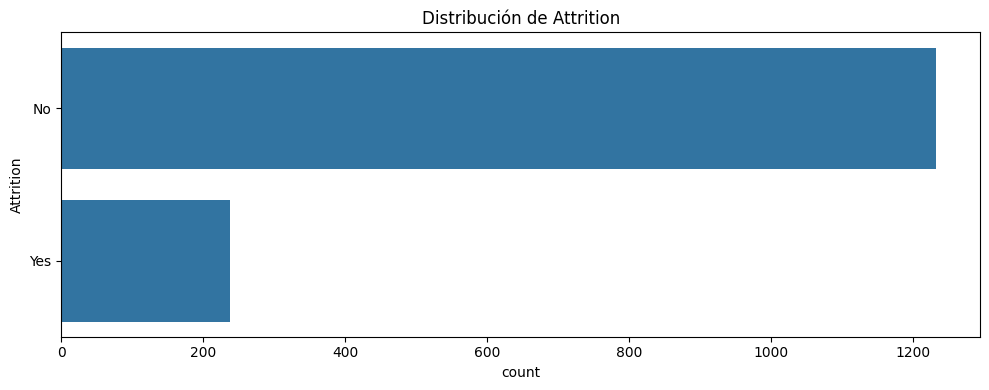


Variable: BusinessTravel
Número de valores únicos: 3
                   Frecuencia  Porcentaje (%)
BusinessTravel                               
Travel_Rarely            1043           70.95
Travel_Frequently         277           18.84
Non-Travel                150           10.20


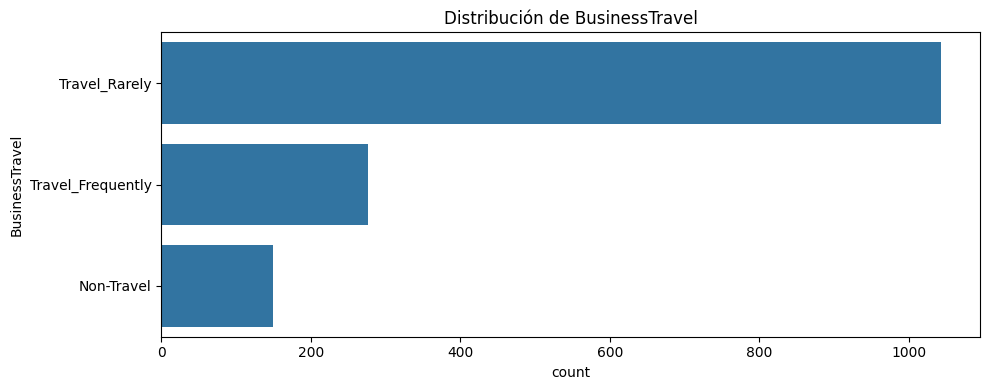


Variable: Department
Número de valores únicos: 3
                        Frecuencia  Porcentaje (%)
Department                                        
Research & Development         961           65.37
Sales                          446           30.34
Human Resources                 63            4.29


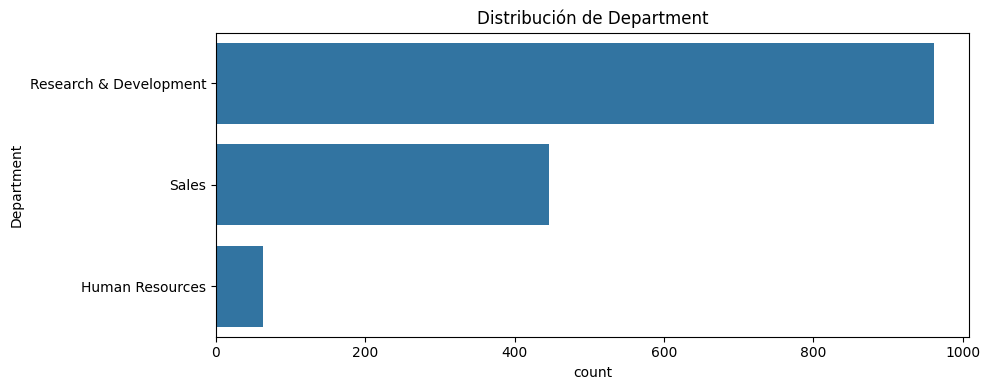


Variable: EducationField
Número de valores únicos: 6
                  Frecuencia  Porcentaje (%)
EducationField                              
Life Sciences            606           41.22
Medical                  464           31.56
Marketing                159           10.82
Technical Degree         132            8.98
Other                     82            5.58
Human Resources           27            1.84


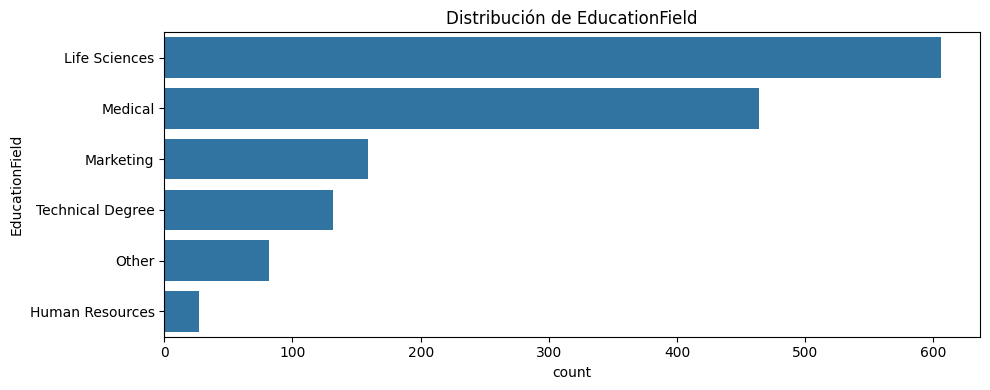


Variable: Gender
Número de valores únicos: 2
        Frecuencia  Porcentaje (%)
Gender                            
Male           882            60.0
Female         588            40.0


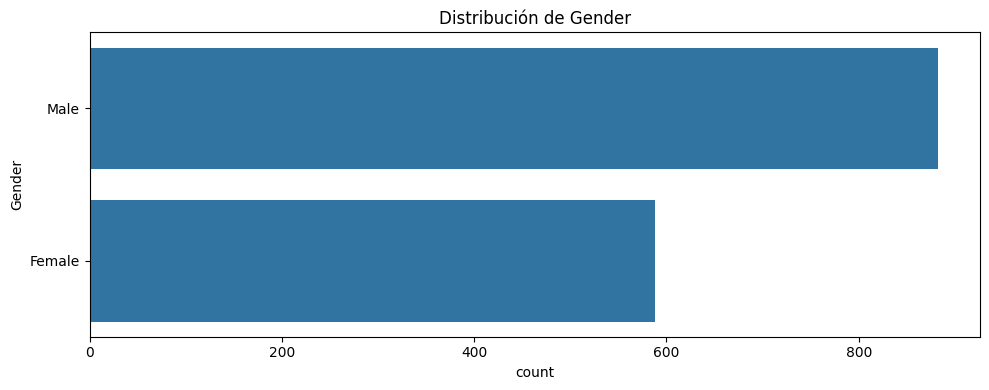


Variable: JobRole
Número de valores únicos: 9
                           Frecuencia  Porcentaje (%)
JobRole                                              
Sales Executive                   326           22.18
Research Scientist                292           19.86
Laboratory Technician             259           17.62
Manufacturing Director            145            9.86
Healthcare Representative         131            8.91
Manager                           102            6.94
Sales Representative               83            5.65
Research Director                  80            5.44
Human Resources                    52            3.54


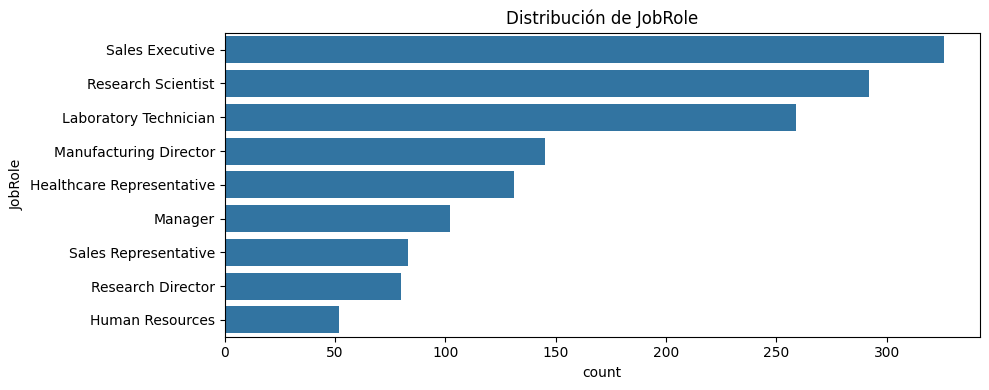


Variable: MaritalStatus
Número de valores únicos: 3
               Frecuencia  Porcentaje (%)
MaritalStatus                            
Married               673           45.78
Single                470           31.97
Divorced              327           22.24


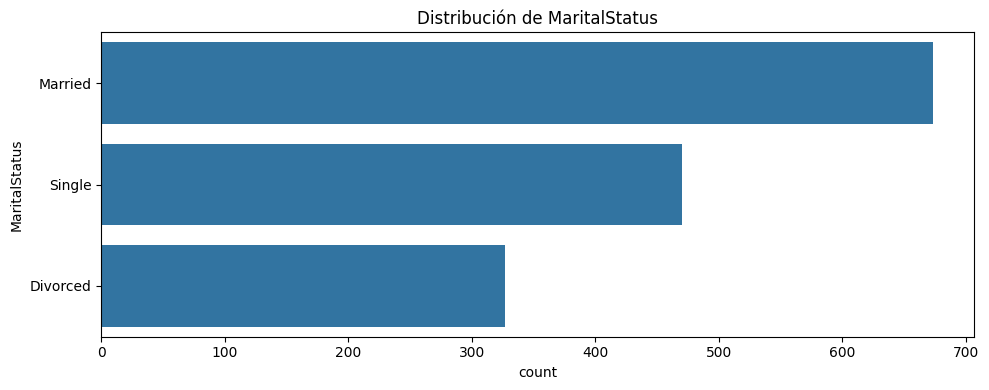


Variable: Over18
Número de valores únicos: 1
        Frecuencia  Porcentaje (%)
Over18                            
Y             1470           100.0


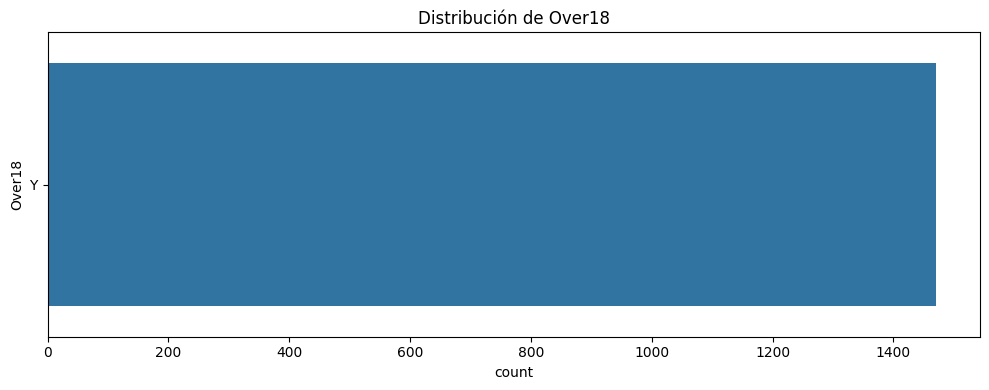


Variable: OverTime
Número de valores únicos: 2
          Frecuencia  Porcentaje (%)
OverTime                            
No              1054            71.7
Yes              416            28.3


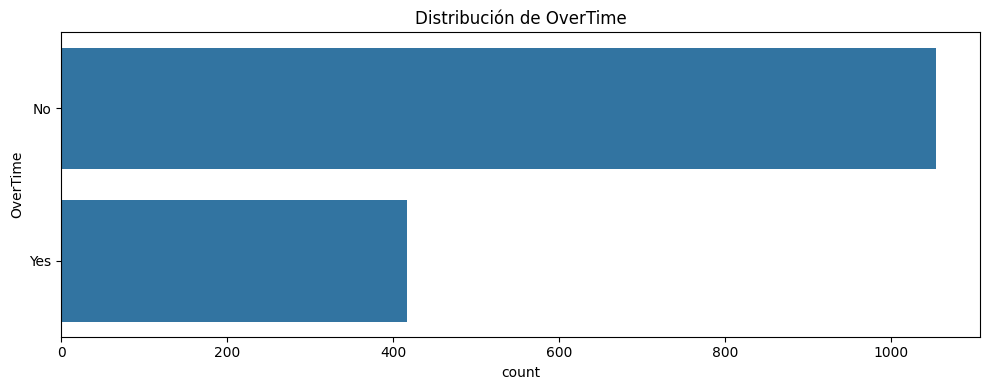

In [26]:
# DESCRIPCION DE LAS VARIABLES CATEGORICAS

# Para cada variable categórica
for col in variables_categoricas:
    # Obtener valores únicos y contar
    valores_unicos = df[col].nunique()
    print(f"\nVariable: {col}")
    print(f"Número de valores únicos: {valores_unicos}")

    # Mostrar distribución de frecuencias
    conteo = df[col].value_counts()
    porcentaje = df[col].value_counts(normalize=True) * 100

    # Combinar conteo y porcentaje en un DataFrame
    resultado = pd.DataFrame({
        'Frecuencia': conteo,
        'Porcentaje (%)': porcentaje.round(2)
    })

    print(resultado)

    # Crear gráfico de barras simple
    plt.figure(figsize=(10, 4))
    sns.countplot(y=col, data=df, order=conteo.index)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

ANALISIS DE LOS RESULTADOS DE LAS ESTADISTICAS DESCRIPTIVA DE LAS VARIABLES CATEGORICAS

Attrition: 2 valores (No y Yes)
No: % 83.88 de los empleados permanecen en la empresa
Yes: % 16.12 de los empleados ha dejado la empresa

BusinessTravel: tiene 3 categorias
Viaja raramente: un %70.95 (La mayoria)
Viaja frecuentemente: un % 18.84
No viaja nunca: un %10.20

Department: Hay 3 departamentos en la empresa
Investigacion y desarrolo es la mas grande con un %65.37 de los empleados.
Ventas corresponde al %30.34.
RRHH es el más pequeño con un %4.29 de los empleados.

Gender: el %40 de los emplados son muejeres y el 60% son hombres.



In [13]:
# CALCULO DE MEDIDAS DE TENDENCIA CENTRAL USANDO LOS DATOS DE LA COLUMNA (EDAD = AGE)

# MEDIA
df['Age'].mean()

np.float64(36.923809523809524)

In [14]:
# Calcular la media y convertirla a entero
media = int(df['Age'].mean())  # Convierte truncando los decimales
print(media)

36


In [15]:
#Media solo de columnas numericas (resultado float)
df.mean(numeric_only=True)


,0
Age,36.923810
DailyRate,802.485714
DistanceFromHome,9.192517
Education,2.912925
EmployeeCount,1.000000
EmployeeNumber,1024.865306
EnvironmentSatisfaction,2.721769
HourlyRate,65.891156
JobInvolvement,2.729932
JobLevel,2.063946


In [16]:
#Convertir a entero
df.mean(numeric_only=True).astype(int)


,0
Age,36
DailyRate,802
DistanceFromHome,9
Education,2
EmployeeCount,1
EmployeeNumber,1024
EnvironmentSatisfaction,2
HourlyRate,65
JobInvolvement,2
JobLevel,2


In [17]:
# MEDIANA
df['Age'].median()

36.0

In [18]:
# MODA
df['Age'].mode()

,Age
0,35


In [20]:
# DESVIACION ESTANDAR
# Seleccionar solo las columnas numéricas antes de calcular la desviación estándar
df.select_dtypes(include=np.number).std()

,0
Age,9.135373e+00
DailyRate,4.035091e+02
DistanceFromHome,8.106864e+00
Education,1.024165e+00
EmployeeCount,1.110601e-16
EmployeeNumber,6.020243e+02
EnvironmentSatisfaction,1.093082e+00
HourlyRate,2.032943e+01
JobInvolvement,7.115611e-01
JobLevel,1.106940e+00


In [22]:
# VARIANZA
# SOLO DE COLUMNAS NUMERICAS
df.select_dtypes(include='number').var()


,0
Age,8.345505e+01
DailyRate,1.628196e+05
DistanceFromHome,6.572125e+01
Education,1.048914e+00
EmployeeCount,1.233434e-32
EmployeeNumber,3.624333e+05
EnvironmentSatisfaction,1.194829e+00
HourlyRate,4.132856e+02
JobInvolvement,5.063193e-01
JobLevel,1.225316e+00


In [23]:
#Cuartiles
df['Age'].quantile([.25, .5, .75])

,Age
0.25,30.0
0.50,36.0
0.75,43.0


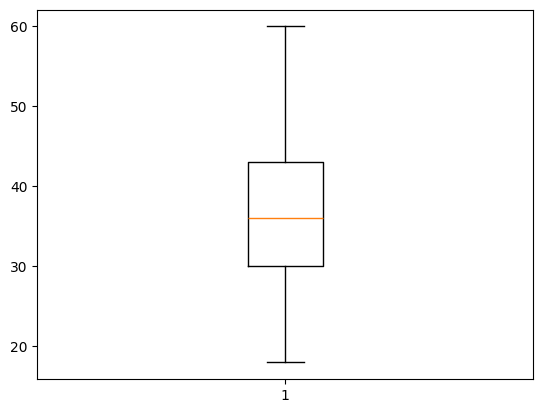

In [24]:
#Diagrama de Cajas
plt.boxplot(list(df['Age']))
plt.show()

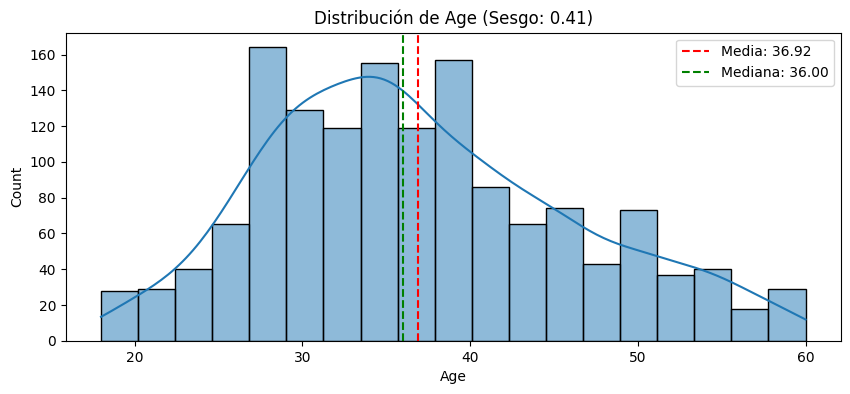

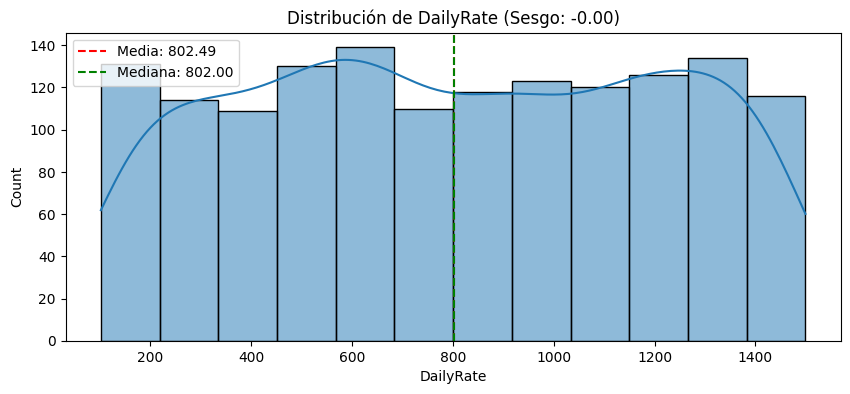

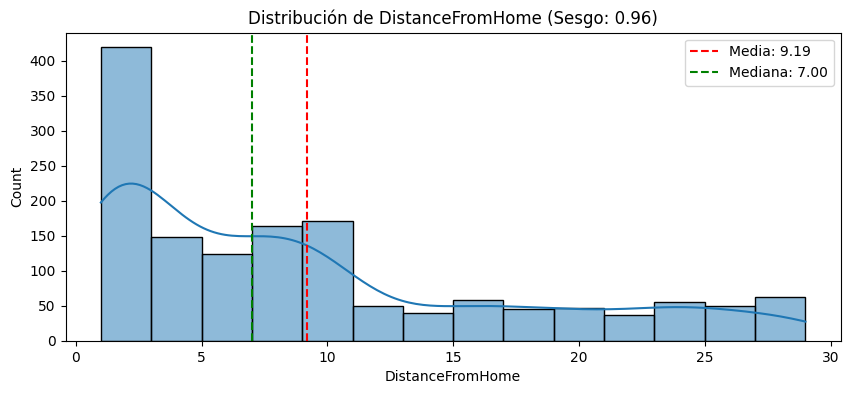

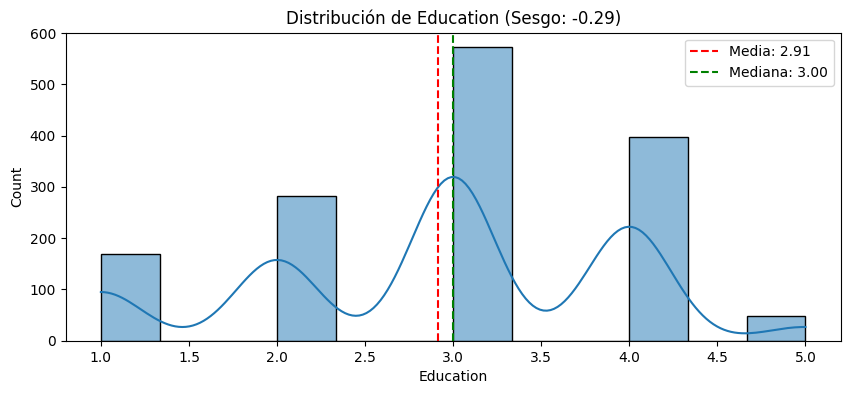

<ipython-input-28-51bc89a2068c>:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sesgo = stats.skew(df[col])
<ipython-input-28-51bc89a2068c>:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  curtosis = stats.kurtosis(df[col])


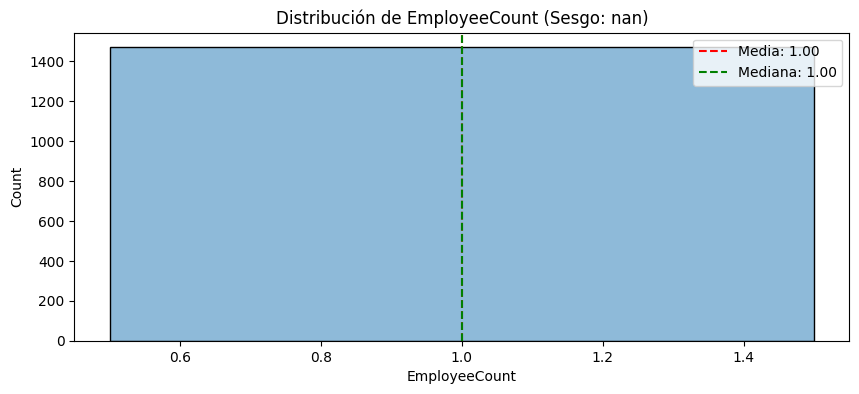

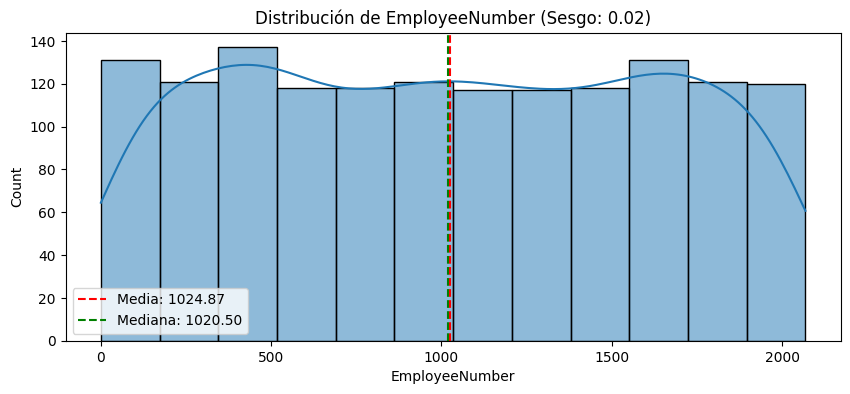

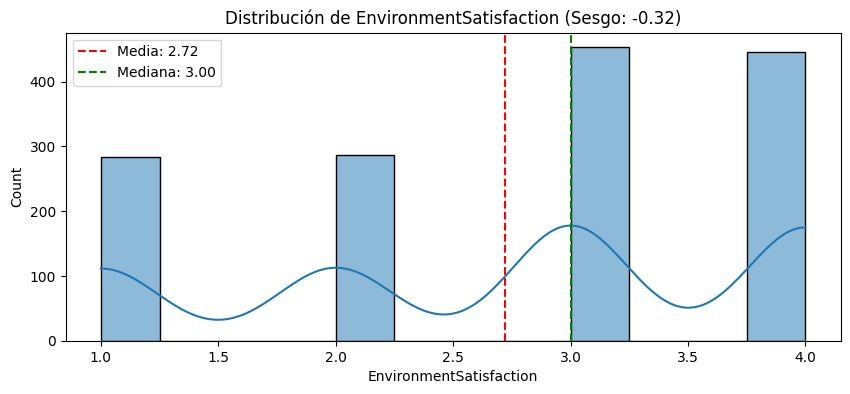

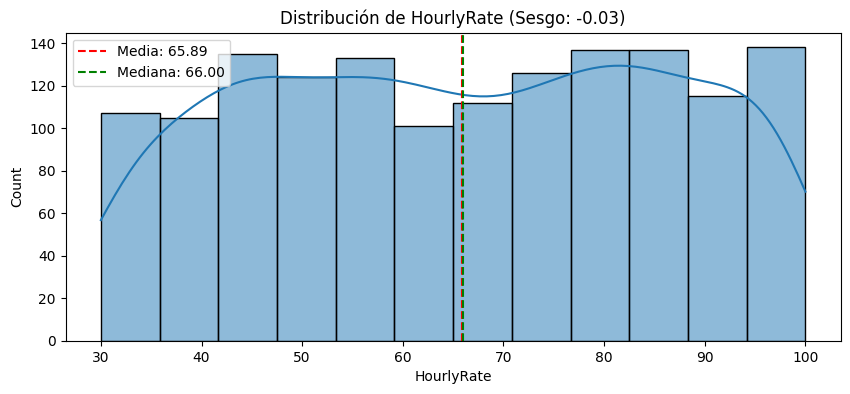

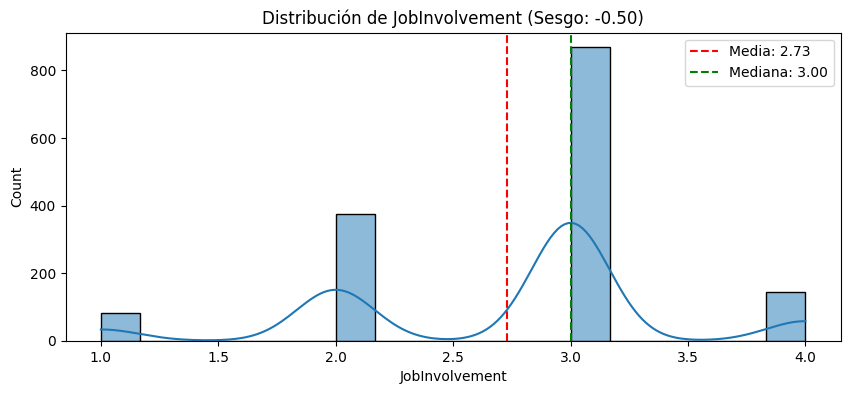

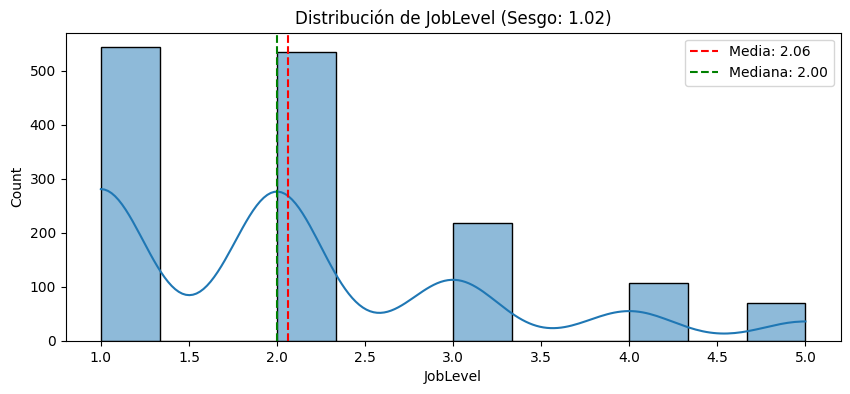

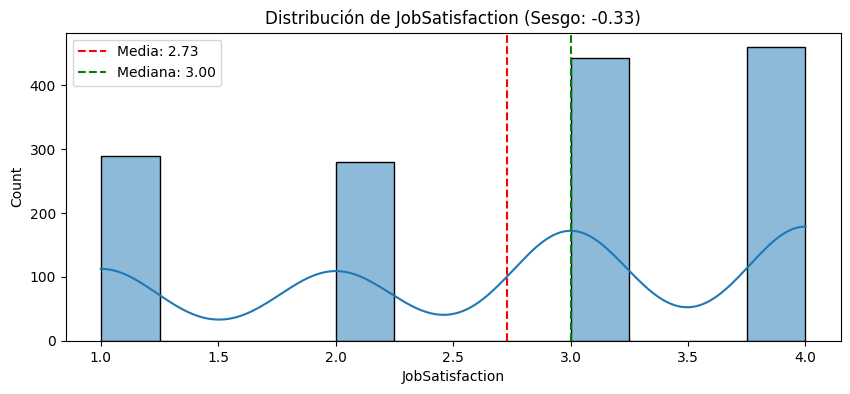

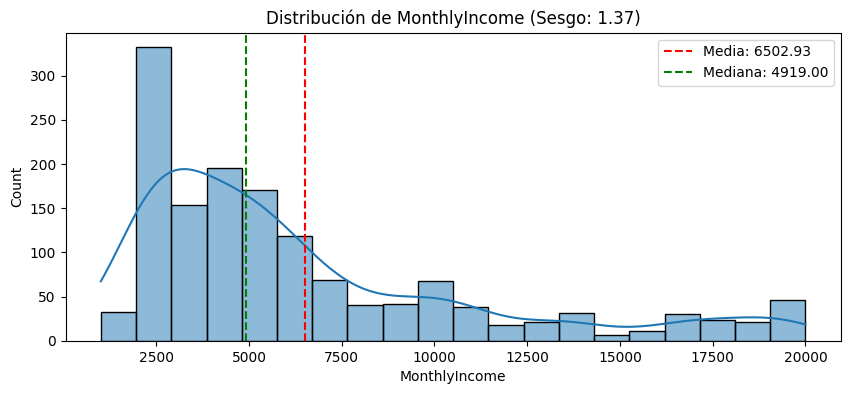

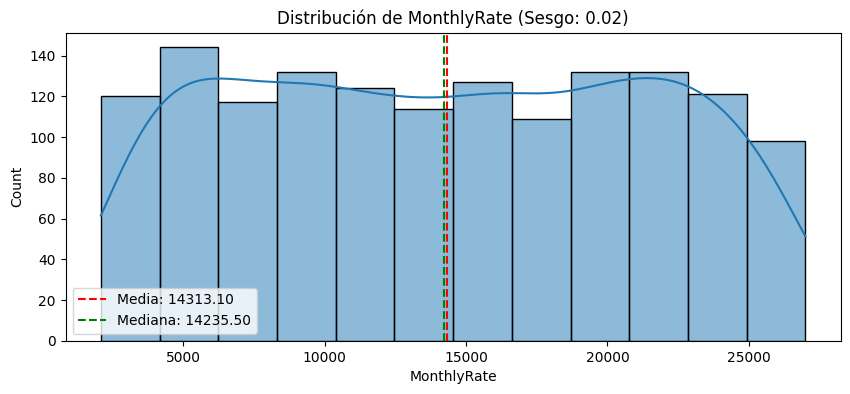

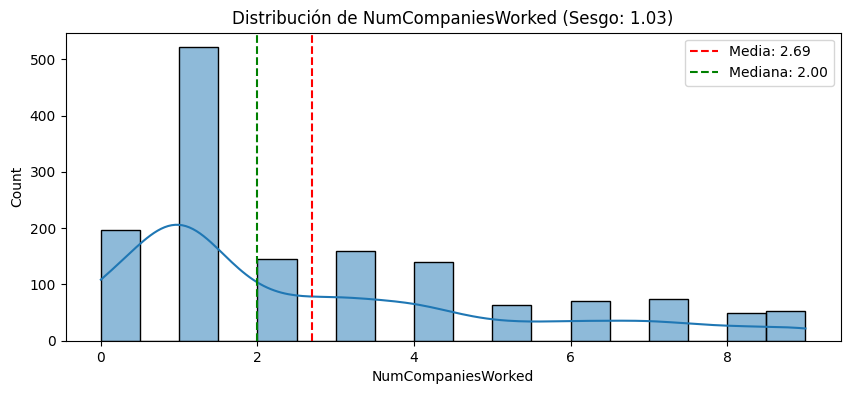

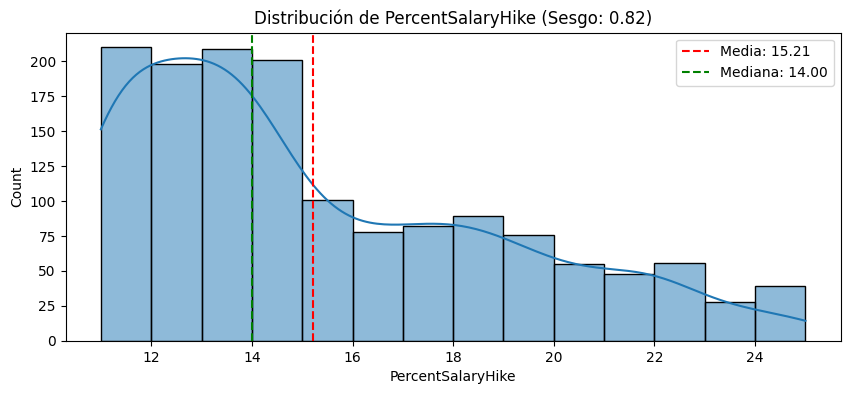

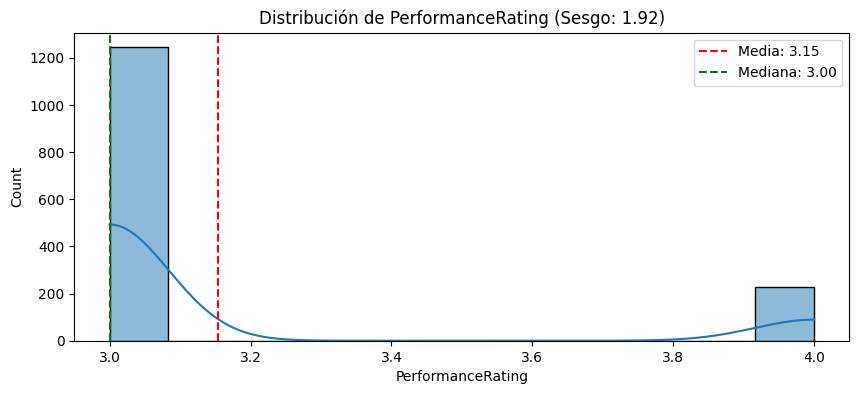

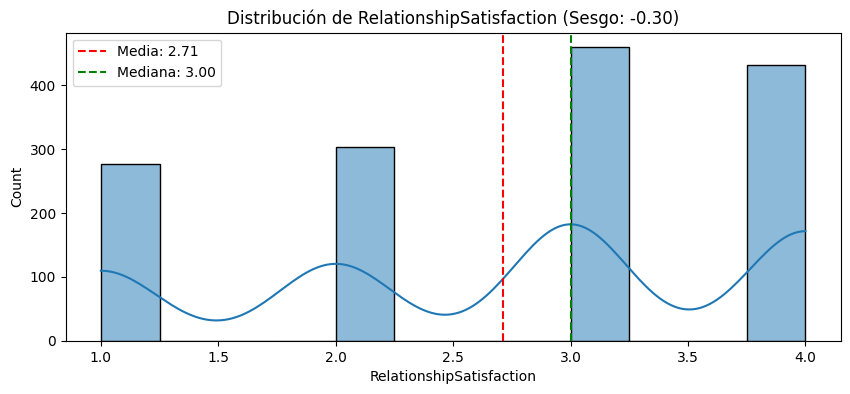

<ipython-input-28-51bc89a2068c>:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sesgo = stats.skew(df[col])
<ipython-input-28-51bc89a2068c>:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  curtosis = stats.kurtosis(df[col])


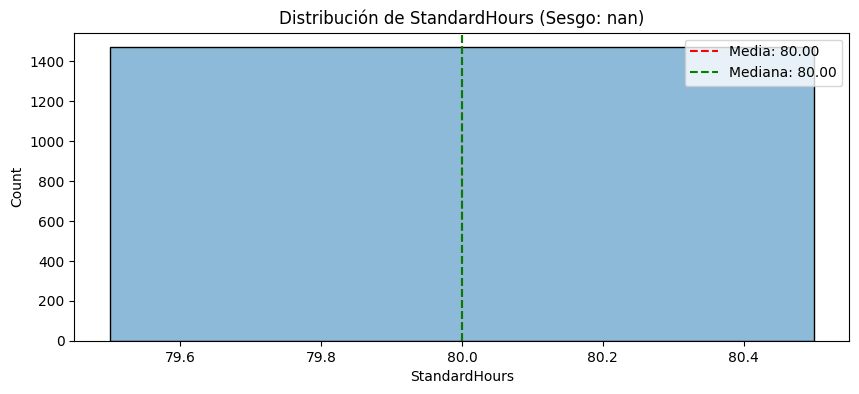

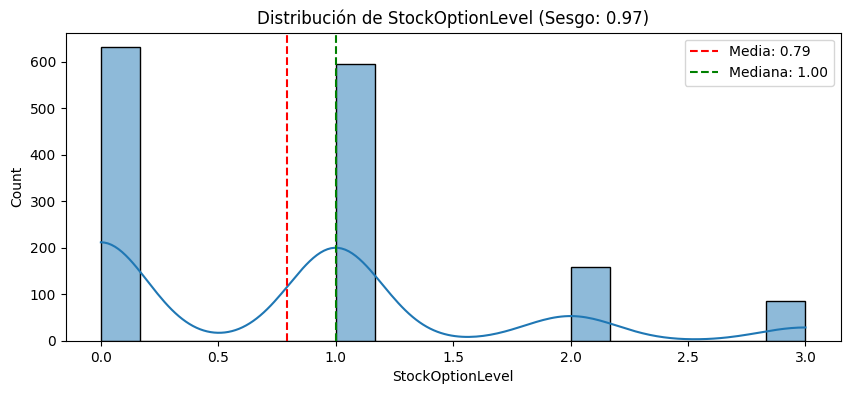

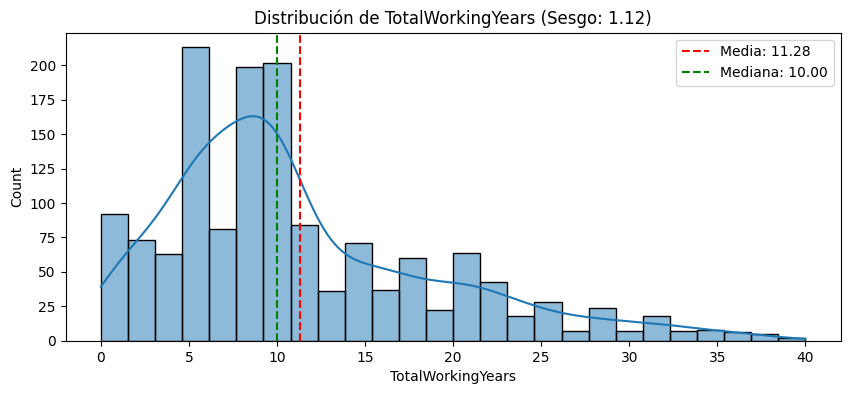

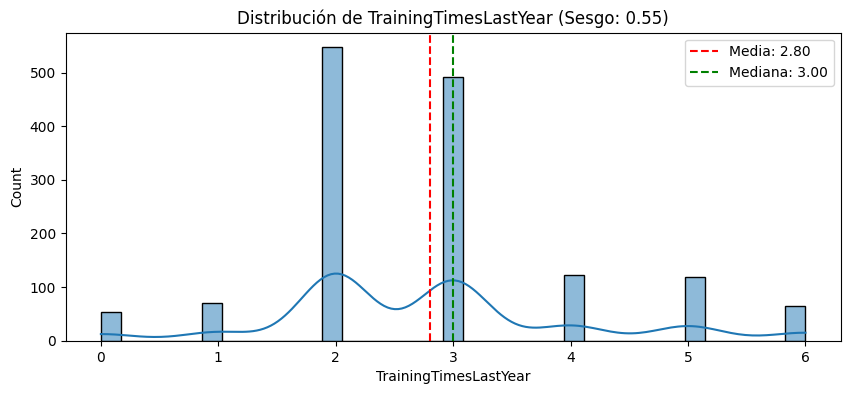

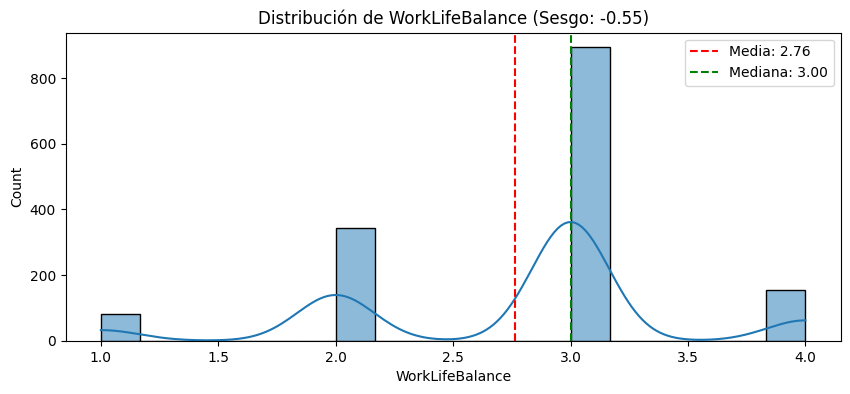

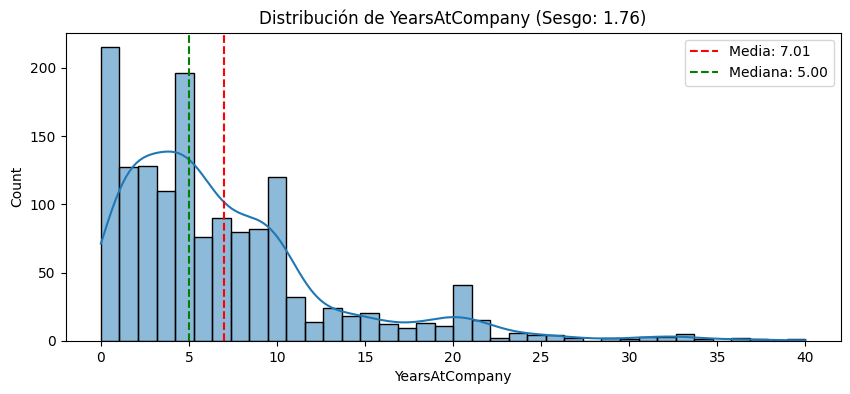

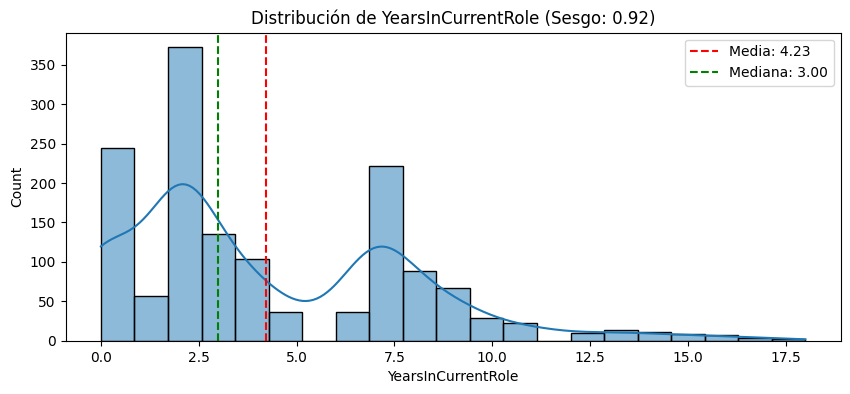

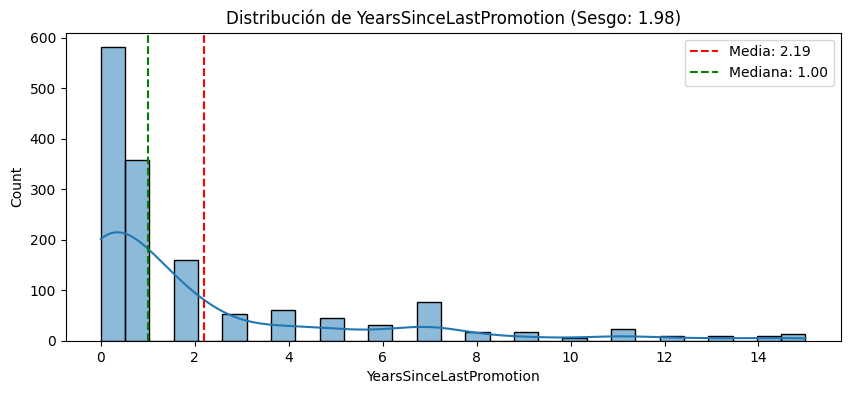

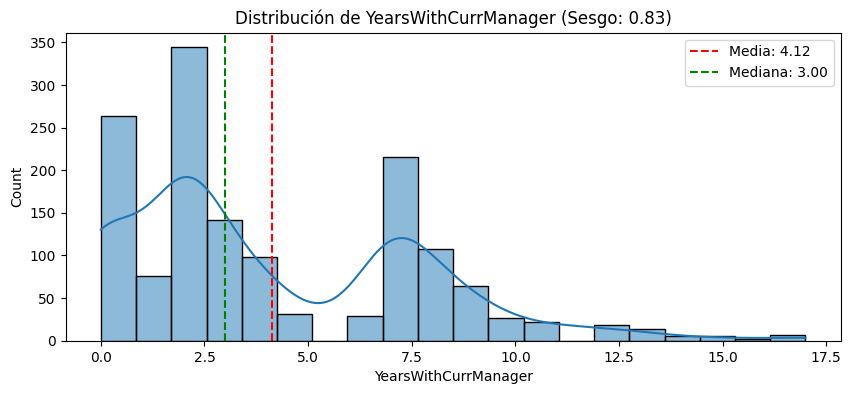

Análisis de distribución (sesgo y simetría):
                             Sesgo  Curtosis  \
YearsSinceLastPromotion   1.982265  3.596318   
PerformanceRating         1.919921  1.686097   
YearsAtCompany            1.762728  3.918057   
MonthlyIncome             1.368419  0.997738   
TotalWorkingYears         1.116032  0.911070   
NumCompaniesWorked        1.025423  0.006100   
JobLevel                  1.024355  0.393717   
StockOptionLevel          0.967991  0.359316   
DistanceFromHome          0.957140 -0.228148   
YearsInCurrentRole        0.916427  0.471720   
YearsWithCurrManager      0.832600  0.166398   
PercentSalaryHike         0.820290 -0.303656   
TrainingTimesLastYear     0.552560  0.489232   
Age                       0.412864 -0.406851   
MonthlyRate               0.018559 -1.214906   
EmployeeNumber            0.016557 -1.223101   
DailyRate                -0.003515 -1.203811   
HourlyRate               -0.032278 -1.196412   
Education                -0.289385 -0.56129

In [28]:
# Análisis de distribución (sesgo y simetría)


# Crear DataFrame para almacenar métricas de distribución
distribucion_df = pd.DataFrame(columns=['Sesgo', 'Curtosis', 'Tipo_Distribución'])

# Analizar cada variable numérica
for col in variables_numericas:
    # Calcular sesgo y curtosis
    sesgo = stats.skew(df[col])
    curtosis = stats.kurtosis(df[col])

    # Determinar tipo de distribución basado en el sesgo
    if abs(sesgo) < 0.5:
        tipo = "Aproximadamente simétrica"
    elif sesgo > 0:
        tipo = "Sesgo positivo (cola hacia la derecha)"
    else:
        tipo = "Sesgo negativo (cola hacia la izquierda)"

    # Guardar resultados
    distribucion_df.loc[col] = [sesgo, curtosis, tipo]

    # Crear histograma con líneas de media y mediana para visualizar
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='--', label=f'Media: {df[col].mean():.2f}')
    plt.axvline(df[col].median(), color='green', linestyle='--', label=f'Mediana: {df[col].median():.2f}')
    plt.title(f'Distribución de {col} (Sesgo: {sesgo:.2f})')
    plt.legend()
    plt.show()

# Mostrar resumen de sesgo y simetría
print("Análisis de distribución (sesgo y simetría):")
print(distribucion_df.sort_values('Sesgo', ascending=False))

Resumen del analisis de distribucion.

Variables con sesgo positivo fuerte. (cargado a la derecha): YearsSinceLastPromotion, PerformanceRating, YearsAtCompany, MonthlyIncome.

Variables con sesgo positivo moderado: YearsInCurrentRole, YearsWithCurrManager,DistanceFromHome, StockOptionLevel, PercentSalaryHike.

Variables con una distribucion equiibrada: Age,MonthlyRate, DailyRate, HourlyRate, RelationshipSatisfaction, EnvironmentSatisfaction, JobSatisfaction
Education, JobInvolvement.

Variable con sesgo negativo: WorkLifeBalance, EmployeeCount, StandardHours.


**Conlusiones preliminares sobre el compotamiento de datos.**

Hay una tasa del 16.12% de desercion.
Hay mas hombres (60%) con una edad promedio de 36.9 años, y hay mas empleados casados, un 45.78 %.

En cuanto a la estructura de la empresa, domina Investigacion y desarrrollo con un 65.37%, con roles principalmente de ventas e investigacion.

Existe una distribucion equilibrada en variables de satosfaccion laboral.

Explorando la relacion entre la svariables de compensacion, desarrollo profecional y satisfaccion podriamos tener una conlusion con respecto a la decision de los empleados de abandonar la empresa.
